In [85]:
%run function_definitions.ipynb

In [67]:
def convert_logger_time(date, time):
    '''
    Take a string in the format of SC program and convert it to something sensible.
    Example string: "b'25.05.2016 13:30:56"
    '''
    # Cut off b' part
    date = date[2:]
    day = int(date[0:2])
    month = int(date[3:5])
    year = 2000 + int(date[6:8])
    
    time = time[2:]
    hour = int(time[0:2])
    minute = int(time[3:5])
    second = int(time[6:8])
    return datetime.datetime(year,month,day,hour,minute,second)

In [97]:
def read_logger_files(fn):
    '''
    Read the ASCII files produced by logger files
    '''
    dt = np.dtype([
                   ('sample',int),
                   ('date', np.str_,10),
                   ('time', np.str_,10),
                   ('c1', int),
                   ('c2', int),
                   ('c3', int),
                   ('c4', int),
                   #('var1', np.float64),
                  ])
    
    logger_data = np.loadtxt(fn, dtype=dt, delimiter = ' ', usecols=(0,1,2,3,4,5,6)) # 11
    timestamps = np.array([convert_logger_time(sample['date'], sample['time']) for sample in logger_data])
    
    logger_data = append_to_array(logger_data, timestamps, 'timestamp')
    
    return logger_data
    

In [98]:
logger_filenames = ['./PTB_DATA/SD_RIP/LG160525.002', 
                   './PTB_DATA/SD_RIP/LG160526.000',
                   './PTB_DATA/SD_RIP/LG160527.000',
                   './PTB_DATA/SD_RIP/LG160528.000',
                   './PTB_DATA/SD_RIP/LG160529.000',
                   './PTB_DATA/SD_RIP/LG160530.000',
                   './PTB_DATA/SD_RIP/LG160531.000',
                   './PTB_DATA/SD_RIP/LG160601.000',
                   './PTB_DATA/SD_RIP/LG160602.000',
                   './PTB_DATA/SD_RIP/LG160603.000',
                    './PTB_DATA/SD_RIP/LG160604.000'
                   ]

In [99]:
log_data = []
for fn in logger_filenames:
    print(fn)
    log_data.append(read_logger_files(fn))
log_data = np.concatenate(log_data)
    

./PTB_DATA/SD_RIP/LG160525.002
./PTB_DATA/SD_RIP/LG160526.000
./PTB_DATA/SD_RIP/LG160527.000
./PTB_DATA/SD_RIP/LG160528.000
./PTB_DATA/SD_RIP/LG160529.000
./PTB_DATA/SD_RIP/LG160530.000
./PTB_DATA/SD_RIP/LG160531.000
./PTB_DATA/SD_RIP/LG160601.000
./PTB_DATA/SD_RIP/LG160602.000
./PTB_DATA/SD_RIP/LG160603.000
./PTB_DATA/SD_RIP/LG160604.000


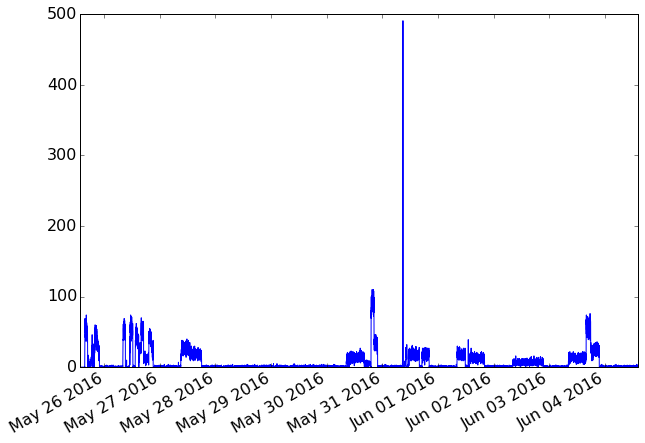

In [101]:
plt.plot(log_data['timestamp'], log_data['c4'])
date_x()

In [53]:
ding2 = ding[0]
convert_sc_time(ding2)

ValueError: invalid literal for int() with base 10: '16 0'

In [71]:
 append_to_array?

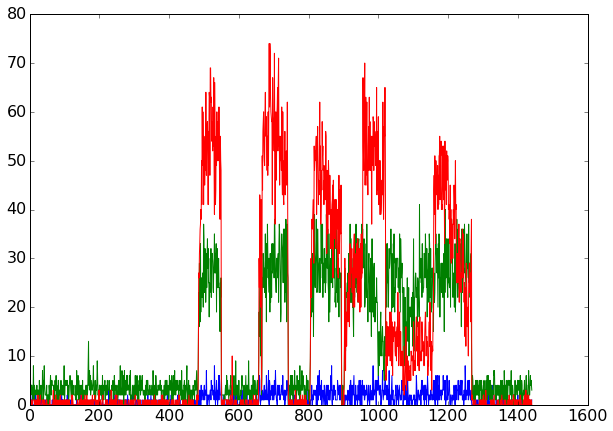

In [28]:
#plt.plot(bla['sample'],bla['c1'])
plt.plot(bla['sample'],bla['c2'])
plt.plot(bla['sample'],bla['c3'])
plt.plot(bla['sample'],bla['c4'])
